In [1]:
import os
from glob import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

task = "pnb"
probe = "Clarius"

from ARGUS_pnb_ar_inference import ARGUS_pnb_ar_inference
from ARGUS_pnb_roi_inference import ARGUS_pnb_roi_inference

In [2]:
nnet_ar = ARGUS_pnb_ar_inference(config_file_name="../ARGUS/ARGUS_"+task+"_ar.cfg", network_name="vfold", device_num=0, source=probe)
nnet_roi = ARGUS_pnb_roi_inference()

In [3]:
#nnet_ar_best_models = [[0,8], [1,0], [2,7]]
nnet_ar_best_models = [[2,7]]
nnet_ar.num_models = len(nnet_ar_best_models)

for r in range(nnet_ar.num_models):
    model_name = os.path.join("Results", task+"_vfold_run"+str(nnet_ar_best_models[r][0]), "best_model_"+str(nnet_ar_best_models[r][1])+".pth")
    nnet_ar.load_model(r, model_name)

In [4]:
vid_names = glob("Data/*.mp4")
vid = ARGUS_load_video(vid_names[1])

In [5]:
print(vid.shape)

(61, 2160, 3840)


In [6]:
nnet_ar.preprocess(vid)

(12, 320, 320)
12


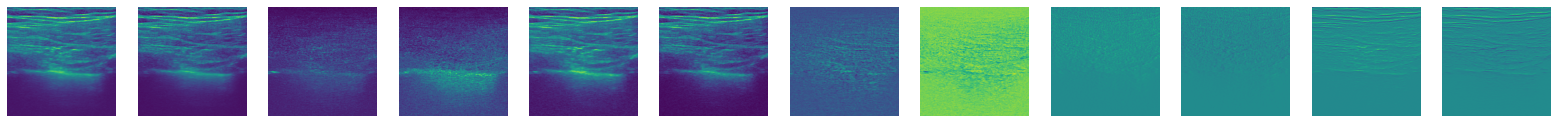

In [7]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = nnet_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [8]:
labels = nnet_ar.inference()

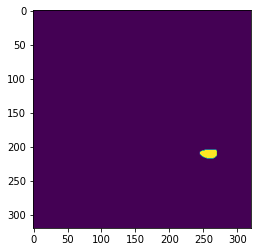

In [9]:
plt.imshow(rotate(labels,270))

In [43]:
nnet_roi.generate_roi(nnet_ar.input_image, nnet_ar.input_array, nnet_ar.label_array)

AttributeError: 'ARGUS_pnb_roi_inference' object has no attribute 'generate_roi'

In [ ]:
nnet_roi.inference()